# Identify full image containing given gragment
## (Image template matching task using OpenCV)

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [12]:
def visualize_match(image_path:str, fragment, coordinates):
    '''Function to visualize matched fragment'''
    # Load the image in color
    img_color = cv2.imread(image_path)

    # Get dimensions of the fragment
    h, w = fragment.shape

    # Draw a red rectangle around the matched region
    top_left = coordinates
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img_color, top_left, bottom_right, (0, 0, 255), 2)

    # Convert from BGR to RGB (OpenCV loads images in BGR)
    img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

    # Show the image using matplotlib
    plt.imshow(img_rgb)
    plt.title(f"Match in {image_path.split('/')[-1]}")
    plt.axis("off")
    plt.show()

In [13]:
# get the current working directory and files
START_DIR = Path("./..")  # Project folder

fragment_name = input("Enter file name for the fragment: ")
fragment_image_path = START_DIR / "data" / "single" / fragment_name
FULL_IMAGE_DIR = START_DIR / "data" / "multiple"

In [14]:
fragment_image_path

PosixPath('../data/single/VDAC-1.jpg')

In [18]:
set_image_paths = list(FULL_IMAGE_DIR.glob("*.jpg"))

In [19]:
# Load the new fragment for the new set of images
set_fragment = cv2.imread(f"{fragment_image_path}", 0)

In [20]:
# Initialize dictionary to store new set match results
set_match_results = {}

In [21]:

# Loop through each image to perform template matching
for image_path in set_image_paths:
    # Load the image
    img = cv2.imread(f"{image_path}", 0)

    # Perform template matching
    result = cv2.matchTemplate(img, set_fragment, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Store the coordinates and score of the match
    set_match_results[image_path.name] = {
        'coordinates': max_loc,
        'score': max_val
    }

In [22]:
# Sort the results by score in descending order to find the match
sorted_results = sorted(set_match_results.items(), key=lambda x: x[1]['score'], reverse=True)

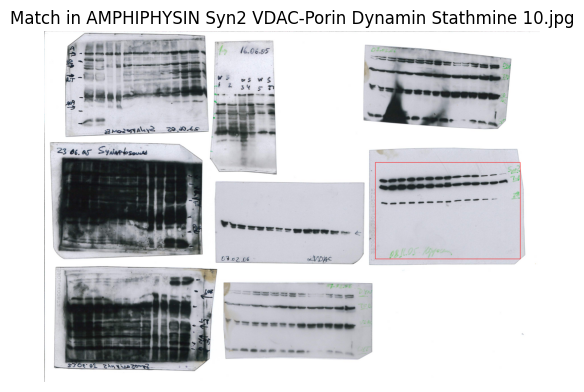

In [23]:
# Visualize the best match for the fragment
match = sorted_results[0][0]
coordinates_fragment = sorted_results[0][1]['coordinates']
match_score = sorted_results[0][1]['score']
visualize_match(f"{Path(FULL_IMAGE_DIR / match)}", set_fragment, coordinates_fragment)

In [25]:
# Return the best match details
print(f'Fragment "{fragment_name}" was found inside the image "{match}" \n on the coordinates {coordinates_fragment}, match score={match_score:.4}') if sorted_results else print("No match found")

Fragment "VDAC-1.jpg" was found inside the image "AMPHIPHYSIN Syn2 VDAC-Porin Dynamin Stathmine 10.jpg" 
 on the coordinates (2343, 928), match score=0.8676


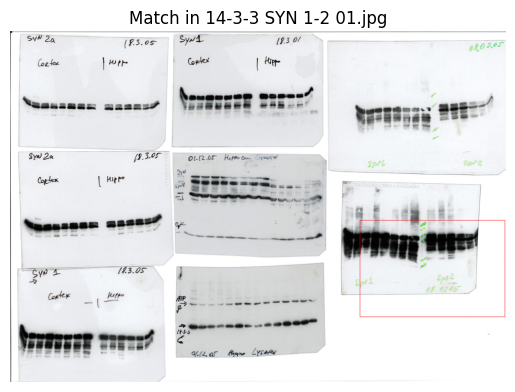

In [26]:
# Visualize second match for the fragment
match = sorted_results[1][0]
coordinates_fragment = sorted_results[1][1]['coordinates']
match_score = sorted_results[1][1]['score']
visualize_match(f"{Path(FULL_IMAGE_DIR / match)}", set_fragment, coordinates_fragment)

In [27]:
# Return second match details
print(f'Fragment "{fragment_name}" was found inside the image "{match}" \n on the coordinates {coordinates_fragment}, match score={match_score:.4}') if sorted_results else print("No match found")

Fragment "VDAC-1.jpg" was found inside the image "14-3-3 SYN 1-2 01.jpg" 
 on the coordinates (2475, 1337), match score=0.7416
